In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [3]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size())
print(labels.size())

torch.Size([4, 3, 32, 32])
torch.Size([4])


In [6]:
def imshow(img):    
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()    
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

plane truck   car plane


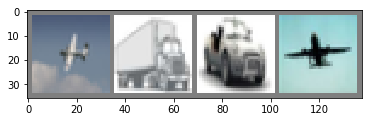

In [7]:
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):
    running_loss = 0.0
    for i, data  in enumerate(trainloader, 0):        
        inputs, labels = data        
        optimizer.zero_grad()
        output = net(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            print(inputs.size())
            print(labels)
            running_loss = 0.0

[1,  2000] loss: 2.224
torch.Size([4, 3, 32, 32])
tensor([ 2,  2,  0,  2])
[1,  4000] loss: 1.925
torch.Size([4, 3, 32, 32])
tensor([ 4,  5,  3,  4])
[1,  6000] loss: 1.732
torch.Size([4, 3, 32, 32])
tensor([ 5,  6,  2,  6])
[1,  8000] loss: 1.617
torch.Size([4, 3, 32, 32])
tensor([ 6,  4,  1,  8])
[1, 10000] loss: 1.542
torch.Size([4, 3, 32, 32])
tensor([ 7,  9,  8,  7])
[1, 12000] loss: 1.476
torch.Size([4, 3, 32, 32])
tensor([ 3,  4,  9,  6])
[2,  2000] loss: 1.425
torch.Size([4, 3, 32, 32])
tensor([ 9,  7,  7,  2])
[2,  4000] loss: 1.385
torch.Size([4, 3, 32, 32])
tensor([ 7,  3,  3,  4])
[2,  6000] loss: 1.362
torch.Size([4, 3, 32, 32])
tensor([ 5,  2,  7,  2])
[2,  8000] loss: 1.340
torch.Size([4, 3, 32, 32])
tensor([ 5,  7,  3,  3])
[2, 10000] loss: 1.282
torch.Size([4, 3, 32, 32])
tensor([ 3,  9,  4,  4])
[2, 12000] loss: 1.285
torch.Size([4, 3, 32, 32])
tensor([ 2,  5,  5,  3])


tensor([[-1.6641, -1.8895,  1.6539,  2.1873,  0.1597,  1.6526,  1.3447,
         -0.3952, -1.3338, -1.6480],
        [ 4.9089,  4.2296, -0.6333, -2.6585, -2.4109, -4.4201, -3.8332,
         -4.1429,  5.1389,  2.5909],
        [ 2.3636,  1.8712, -0.2566, -0.9931, -1.9626, -2.6699, -2.5232,
         -2.1228,  3.5619,  1.8004],
        [ 3.8847,  1.0313,  0.7171, -0.8596, -0.7817, -2.8294, -2.6666,
         -3.1406,  3.7131,  0.1389]])


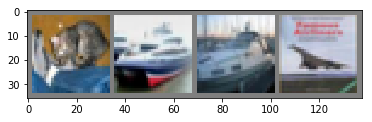

In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

output = net(images)
print(output)

In [14]:
_, predicted = torch.max(output, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        output = net(images)
        _, predicted = torch.max(output.data,1)
        total += labels.size(0)
        correct += ( predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))        

Accuracy of the network on the 10000 test images: 55 %


In [16]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 62 %
Accuracy of  bird : 38 %
Accuracy of   cat : 33 %
Accuracy of  deer : 60 %
Accuracy of   dog : 36 %
Accuracy of  frog : 67 %
Accuracy of horse : 63 %
Accuracy of  ship : 76 %
Accuracy of truck : 56 %


In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu
